# pt selector, njets test

In [1]:
import sys
import os
sys.path.append(os.path.realpath(".."))
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="7"
import uproot as ur
import uproot_methods as urm
import numpy as np
import awkward
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.preprocessing.sequence import pad_sequences

import tools
import pt_selector

with open("../filepath.txt", 'r') as f:
    filename = f.read()

s_table = tools.open_file(filename, sort_by="tag")

Using TensorFlow backend.


sorting data by tag


In [2]:
print("filtering from", len(s_table), "total events")

# filter so we get events with 3 or 4 b-jets, and 3 tags
nb34 = (s_table.nbjets == 3) | (s_table.nbjets == 4) # 3 or 4 b-jets
nj4 = s_table.njets >= 4 # at least 4 jets
nt3 = s_table.nbtags==3  # 3 b-tags
events = s_table[nb34 & nt3 & nj4]

# and ensure that the 3 tags are actually correct
# this results in very little event loss
events = events[events.truth[:,0] == 1]
events = events[events.truth[:,1] == 1]
events = events[events.truth[:,2] == 1]

n_events = len(events)
print(n_events)

filtering from 777150 total events
302694


Don't worry if you see a warning about dividing by zero, fixing that!
[58.40530191 59.25067916 72.83451433 ... 65.77161245 29.08462278
 30.9481952 ]
25660


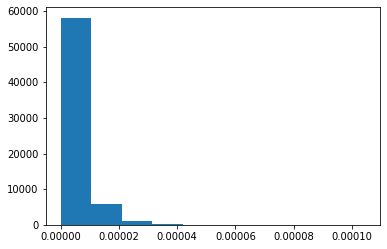

 27%|██▋       | 17605/65357 [00:00<00:00, 176045.55it/s]

evaluating for njets = 4


100%|██████████| 65357/65357 [00:00<00:00, 157007.52it/s]


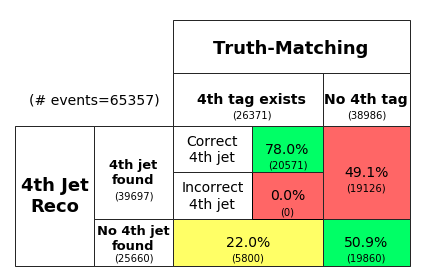

Don't worry if you see a warning about dividing by zero, fixing that!
[ 55.82975012 219.26072616 430.96747917 ...  84.33827441 237.88711662
 223.6430397 ]
72668


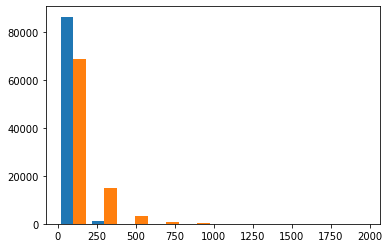

 23%|██▎       | 20558/87866 [00:00<00:00, 205576.77it/s]

evaluating for njets = 5


100%|██████████| 87866/87866 [00:00<00:00, 203637.77it/s]


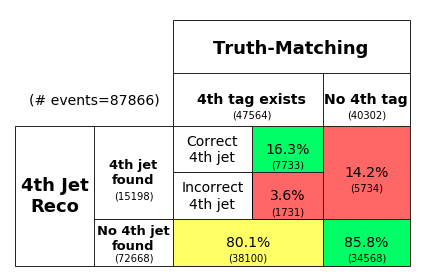

Don't worry if you see a warning about dividing by zero, fixing that!
[ 99.37827294 364.43683162 111.08623772 ... 112.58475122  83.12779734
 528.75534021]
60614


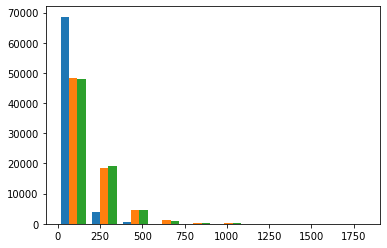

 14%|█▍        | 10108/73220 [00:00<00:00, 101078.89it/s]

evaluating for njets = 6


100%|██████████| 73220/73220 [00:00<00:00, 135043.23it/s]


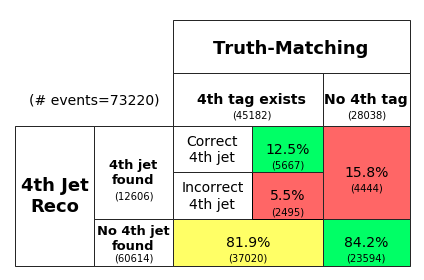

Don't worry if you see a warning about dividing by zero, fixing that!
[ 83.41306822  81.69432443  90.55437342 ... 103.75198452 173.09624308
  56.54294515]
37042


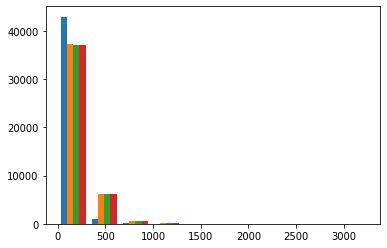

 90%|████████▉ | 39519/44037 [00:00<00:00, 197075.65it/s]

evaluating for njets = 7


100%|██████████| 44037/44037 [00:00<00:00, 192793.20it/s]


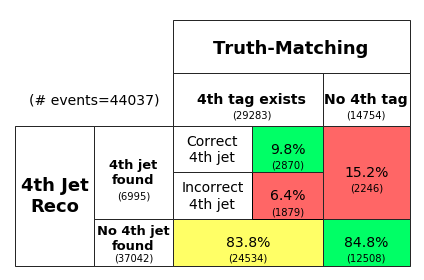

Don't worry if you see a warning about dividing by zero, fixing that!
[180.90318149 198.98042215 270.70141219 ... 311.39085377  41.91519976
 208.39863077]
17816


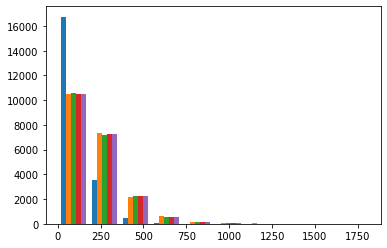

100%|██████████| 20854/20854 [00:00<00:00, 210607.46it/s]

evaluating for njets = 8



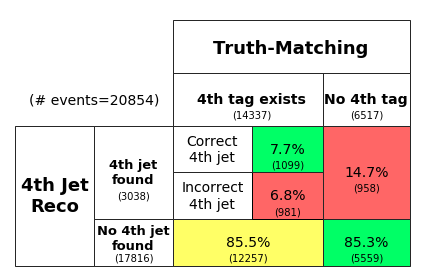

In [18]:
import importlib
importlib.reload(pt_selector)
for i in range(4, 9):
    # events with i jets
    events_i = events[events.njets==i]
    # pad events out to i events
    events_i = tools.pad(events_i, i)
    # boost/rotate
    events_i = tools.boost_and_rotate(events_i)
    selections = pt_selector.select(events_i)
    # compare to truth
    print("evaluating for njets =", i)
    tools.evaluate_model(events_i.truth, events_i.tag, selections)